In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:13<00:00, 20.6MB/s]
100% 1.06G/1.06G [00:13<00:00, 83.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r') # Use ZipFile class to create ZipFile object
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization # Import BatchNormalization

model = Sequential() # Create a Sequential model instance

# ... rest of the code
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) # Now BatchNormalization is defined
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# ... rest of the code

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout # Import Dropout

# ... rest of the code remains the same

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_2 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 116ms/step - loss: 1.5264 - accuracy: 0.5781 - val_loss: 0.6715 - val_accuracy: 0.6274
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5792 - accuracy: 0.6973 - val_loss: 0.7501 - val_accuracy: 0.6482
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5040 - accuracy: 0.7498 - val_loss: 0.5498 - val_accuracy: 0.7278
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4457 - accuracy: 0.7954 - val_loss: 0.6677 - val_accuracy: 0.6916
Epoch 5/10
625/625 [==============================] - 71s 112ms/step - loss: 0.3935 - accuracy: 0.8252 - val_loss: 0.6520 - val_accuracy: 0.7084
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3222 - accuracy: 0.8608 - val_loss: 0.4572 - val_accuracy: 0.8038
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2541 - accuracy: 0.8939 - val_loss: 0.6152 - val_ac

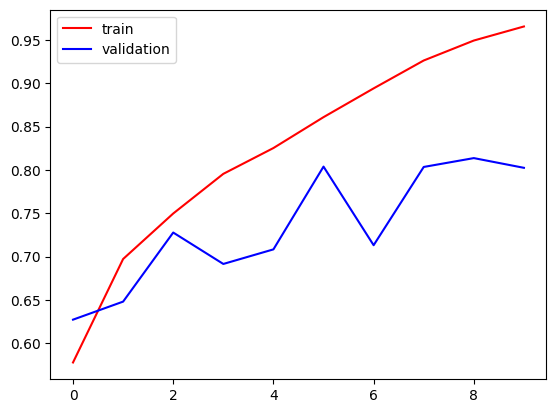

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

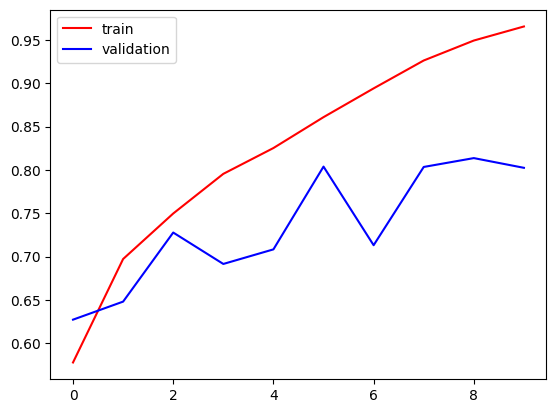

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

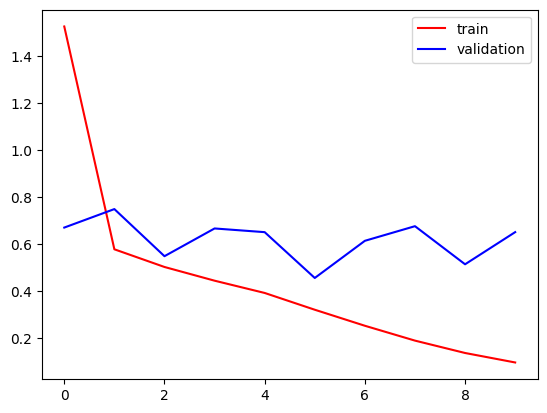

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:

import cv2

In [19]:
test_img = cv2.imread('/content/cat.jpg')

TypeError: Image data of dtype object cannot be converted to float

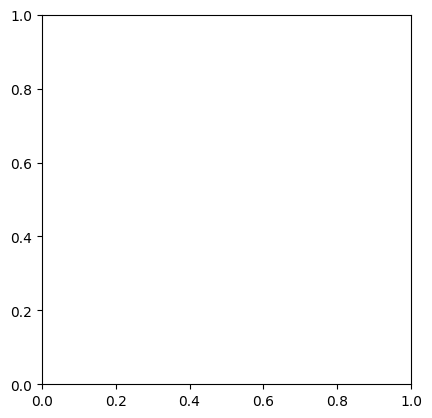

In [20]:
plt.imshow(test_img)

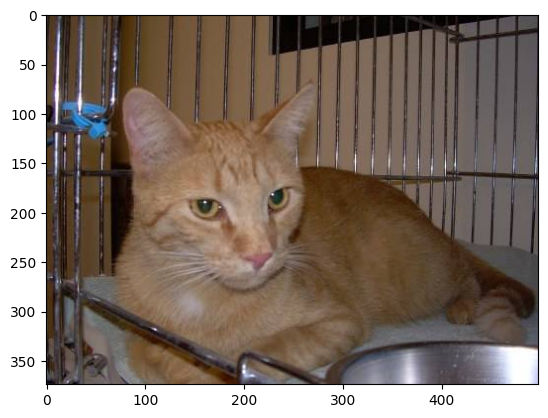

In [22]:
import cv2
import matplotlib.pyplot as plt

# Try to load the image
test_img = cv2.imread('/content/cat.jpg')

# Check if the image loaded successfully
if test_img is None:
    print("Failed to load image. Check the file path and ensure the image is not corrupted.")
else:
    # Convert the image from BGR (OpenCV's default) to RGB (Matplotlib's default)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    plt.imshow(test_img)
    plt.show()

In [23]:
test_img.shape

(374, 498, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 420ms/step


array([[1.]], dtype=float32)